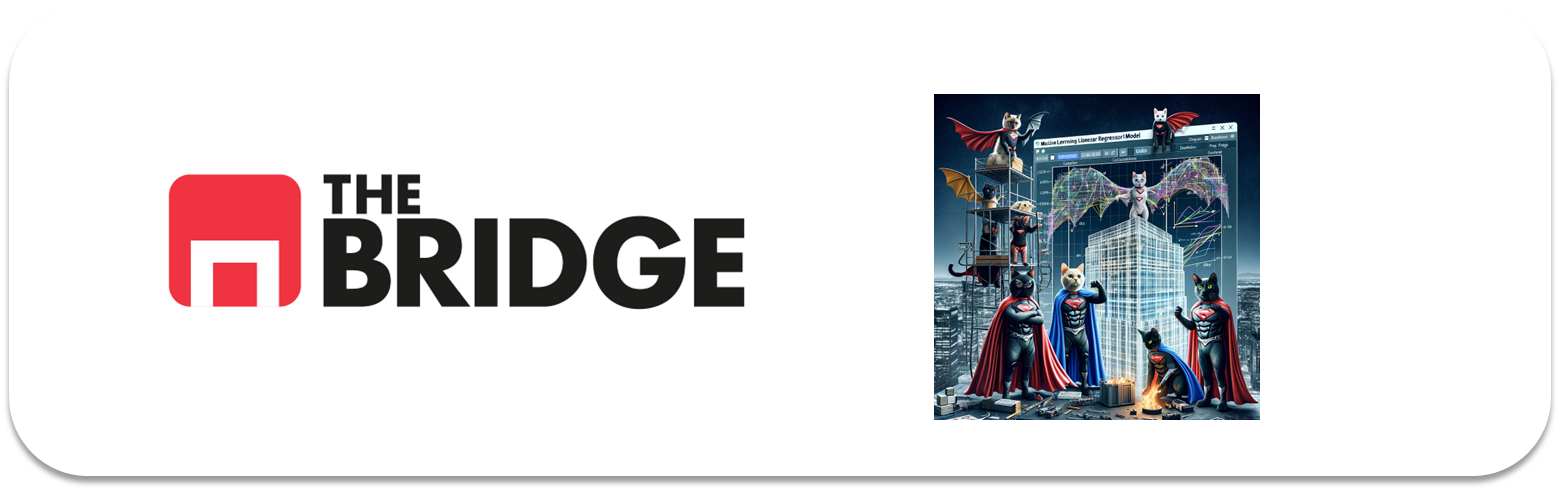

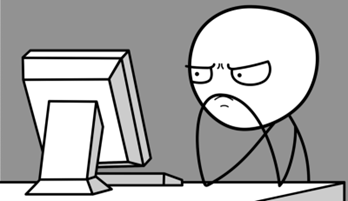

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [27]:
#Cargamos el dataset y creamos el DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Creamos el target
df["target"] = iris.target


### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [30]:
for columna in df.columns:
    print(f"Para la variable {columna} hay {df[columna].nunique()} valores únicos")

Para la variable sepal length (cm) hay 35 valores únicos
Para la variable sepal width (cm) hay 23 valores únicos
Para la variable petal length (cm) hay 43 valores únicos
Para la variable petal width (cm) hay 22 valores únicos
Para la variable target hay 3 valores únicos


La única variable categórica es el *target*. Revisamos su distribución

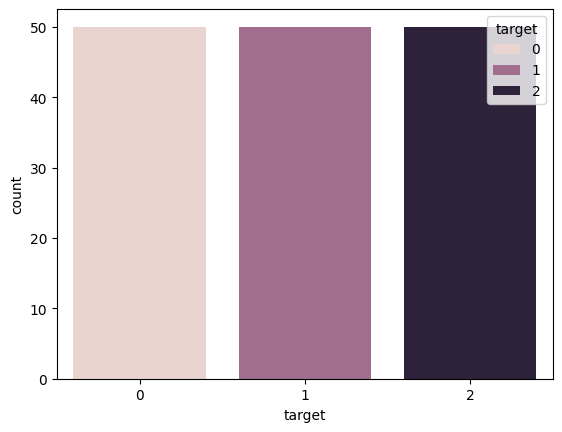

In [31]:
sns.countplot(x= "target", data = df, hue = "target");

Está totalmente balanceado

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


In [32]:
#Dividimos el DataFrame en train y test
train_set, test_set = train_test_split (df, test_size=0.2,random_state=42)

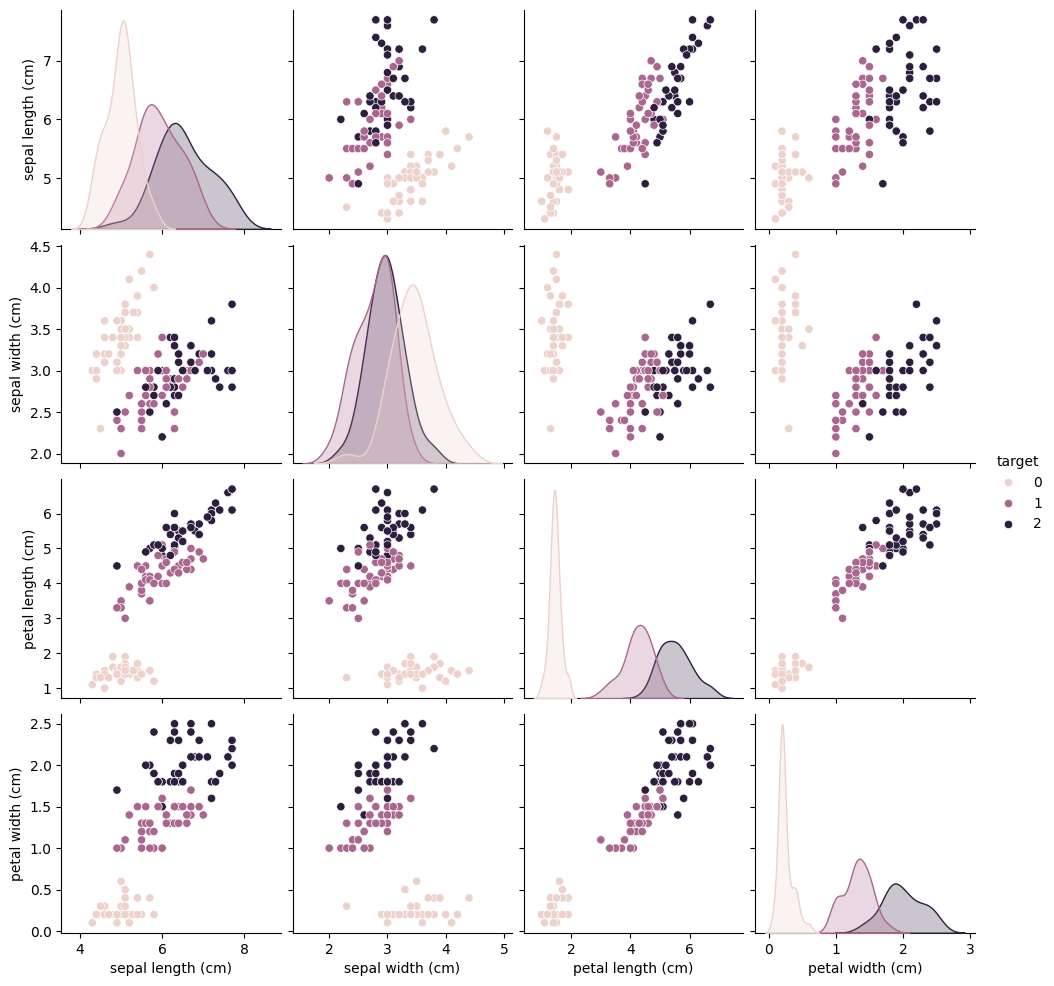

In [33]:
#Mostramos la distribución de las variables numéricas
sns.pairplot(train_set, hue= "target");

Se observa que las 4 variables tienen influencia en el *target* en mayor o menor medida. Nos quedamos con ellas como *features*

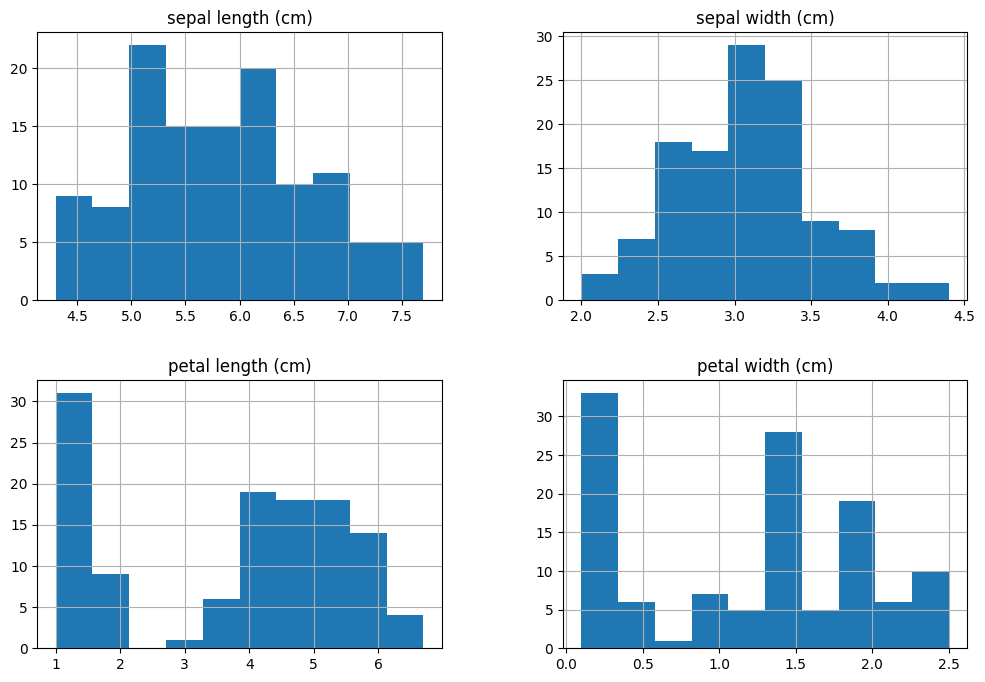

In [34]:
columnas_numericas = [columna for columna in train_set.columns if columna != "target"]
train_set[columnas_numericas].hist(figsize=(12,8));

Tienen una distribución relativamente centrada, por lo que no necesitaremos aplicar el logaritmo. Realizamos el escalado de estandarización

In [35]:
#Realizamos la estandarización de las variables numéricas
scaler = StandardScaler()
scaler.fit(train_set[columnas_numericas]) #Hacemos el fit solo con los datos de train

#Creamos los DataFrames X e y
X_train = pd.DataFrame(scaler.transform(train_set[columnas_numericas]), columns = columnas_numericas)
X_test = pd.DataFrame(scaler.transform(test_set[columnas_numericas]), columns =  columnas_numericas)

y_train = train_set["target"]
y_test = test_set["target"]

In [36]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.754152e-15,-1.694940e-15,-2.294461e-16,-2.960595e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.839628e+00,-2.373778e+00,-1.562535e+00,-1.446088e+00
25%,-8.644522e-01,-5.850598e-01,-1.276006e+00,-1.179118e+00
50%,-7.212234e-02,-1.378803e-01,2.998997e-01,1.557325e-01
75%,7.202076e-01,7.564785e-01,7.869979e-01,8.231577e-01
max,2.304867e+00,2.992376e+00,1.703889e+00,1.757553e+00


Aquí la media y desviación estándar son cercanas a 0 y 1, respectivamente, ya que hemos usado los datos de train para escalar las variables

In [37]:
X_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,30.000000,30.000000,30.000000,30.000000
mean,0.208241,-0.048444,0.089779,0.106788
std,1.030061,0.860167,1.055172,1.082443
min,-1.352040,-1.926598,-1.390618,-1.446088
25%,-0.468287,-0.585060,-1.218701,-1.145747
50%,0.293568,-0.137880,0.443164,0.222475
75%,0.842104,0.309299,0.829977,1.090128
max,2.548661,1.650837,1.818500,1.490583


En este caso no, y es normal, porque hemos usado los valores de media y desviación estándar originales del dataset de train. Así debe ser ya que el test son siempre datos que simulan los datos nuevos que pueden venirnos en el futuro, por lo tanto no podemos tenerlo para el entrenamiento y no podemos usarlos para escalar

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [38]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

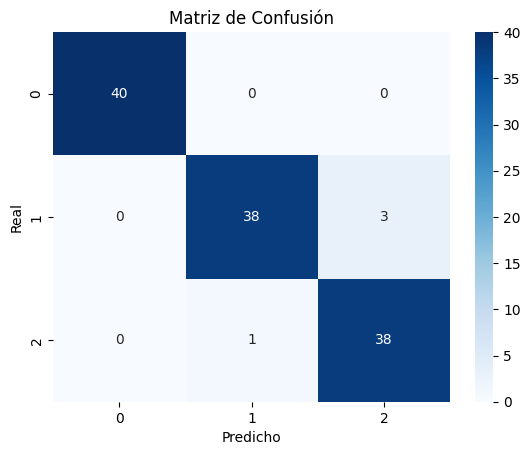

In [39]:
#Predicciones de train
pred_train = model.predict(X_train)

#Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

#Visualizamos la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

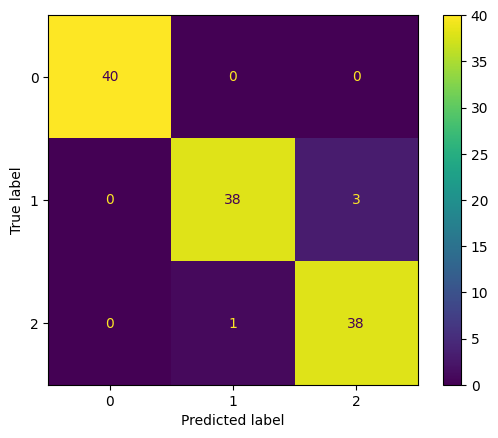

In [40]:
#ALTERNATIVA: con el método de sklearn
ConfusionMatrixDisplay.from_predictions(y_train,pred_train);

In [41]:
#Generamos el informe de clasificación
report = classification_report(y_train, pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

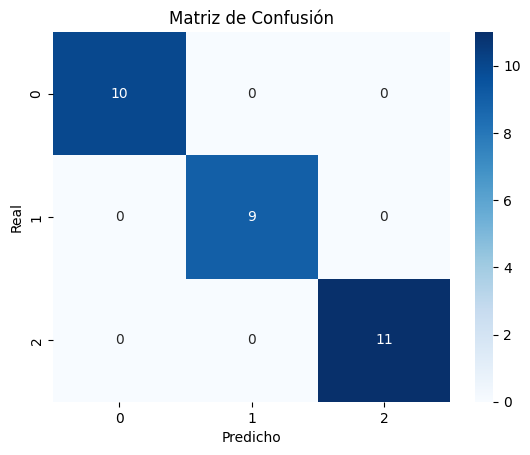

In [42]:
#Predicciones de test
pred_test = model.predict(X_test)

#Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_test)

#Visualizamos la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [43]:
#Generamos el informe de clasificación
report = classification_report(y_test, pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [44]:
model.coef_

array([[-1.00316768,  1.14456076, -1.81255767, -1.69176083],
       [ 0.52785456, -0.28289055, -0.34085076, -0.71984718],
       [ 0.47531311, -0.8616702 ,  2.15340842,  2.41160801]])

Son 3 arrays debido a que emplea la estrategia one-vs-all para la multiclasificación, creando modelos independientes de clasificación de cada variable con las demás

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

DataFrame de coeficientes del modelo 0-vs-rest:
                   Coeficientes
sepal length (cm)     -1.003168
sepal width (cm)       1.144561
petal length (cm)     -1.812558
petal width (cm)      -1.691761

DataFrame de coeficientes del modelo 1-vs-rest:
                   Coeficientes
sepal length (cm)      0.527855
sepal width (cm)      -0.282891
petal length (cm)     -0.340851
petal width (cm)      -0.719847

DataFrame de coeficientes del modelo 2-vs-rest:
                   Coeficientes
sepal length (cm)      0.475313
sepal width (cm)      -0.861670
petal length (cm)      2.153408
petal width (cm)       2.411608



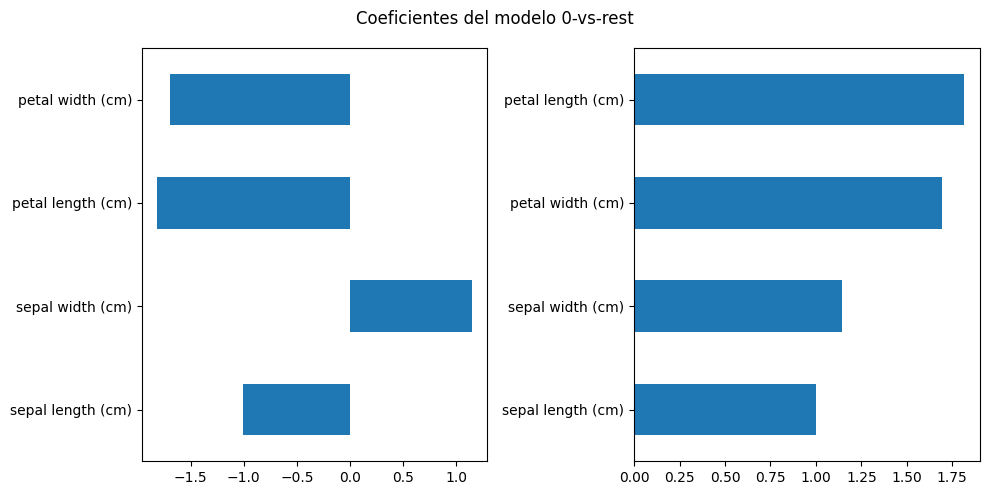

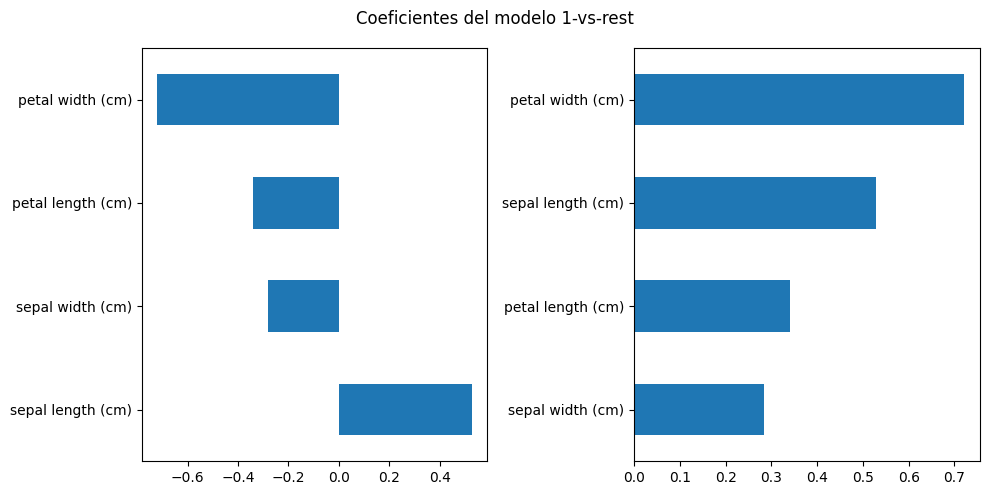

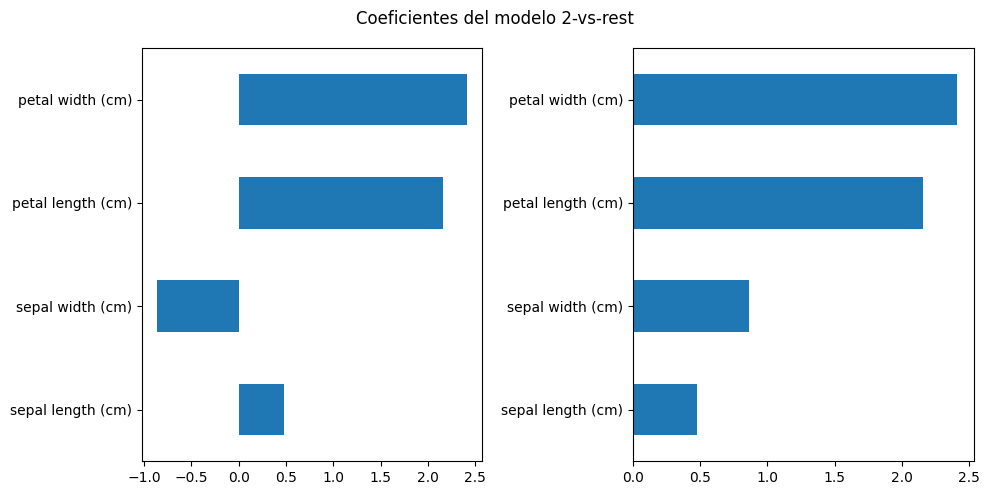

In [57]:
def muestra_coeficientes(model, figsize=(10, 5)): 
    # Obtenemos el número de submodelos, ya que coef_ devuelve un array de dimensión 2 y la cardinalidad de la primera da el numero de modelos o sea el número de clases
    numero_submodelos = model.coef_.shape[0] 
 
    dataframe_coeficientes = []
    for model_index in range(numero_submodelos):
        
        #Creamos un DataFrame con los coeficientes
        df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["Coeficientes"]) # El indice dice que juego de coeficientes considerar

        #Mostramos los coeficientes
        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="Coeficientes").plot(kind="barh", ax=ax[1], legend=False)
        
        #Cambiamos la leyenda para ver qué modelo está presentando
        fig.suptitle(f"Coeficientes del modelo {model_index}-vs-rest") 

        #Para que se muestre ajustado
        fig.tight_layout()
        
        #Guardamos el DataFrame de coeficientes en una lista
        dataframe_coeficientes.append(df_coef.copy())

    return dataframe_coeficientes

a=muestra_coeficientes(model)

for i in range(len(a)):
    print(f"DataFrame de coeficientes del modelo {i}-vs-rest:")
    print(a[i])
    print("")
